# Class 15: Canny Detector and Hough Transform

## Preliminaries

Run the cell below to download the course library.

In [1]:
from urllib.request import urlretrieve

urlretrieve('https://drive.google.com/uc?export=download&id=1SiLnO91qJWKomBkGhKciJSG9Hcd_zRp7', 'sdx.zip')
!unzip -o 'sdx.zip'
!rm 'sdx.zip'

urlretrieve('https://drive.google.com/uc?export=download&id=11bJ7LOyLXeW7enh-LlOHJWJfh6cg4NPN', '15.zip')
!unzip -o '15.zip'
!rm '15.zip'

Archive:  sdx.zip
  inflating: sdx.py                  
Archive:  15.zip
  inflating: road-large.png          
  inflating: road-small.png          


Run the cell below to import the class modules.

If you get import warnings, try using **`Ctrl+M .`** to restart the kernel. *(notice there is a dot there)*

In [2]:
import cv2 as cv
import seaborn as sns

from sdx import *

## Loading input image

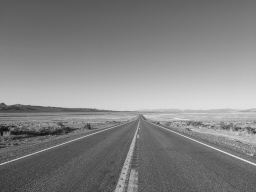

In [3]:
image = cv_grayread('road-small.png')

height, width = image.shape

cv_imshow(image)

## Detecting Canny edges

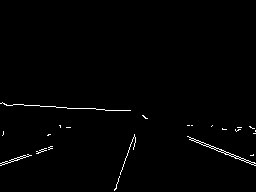

In [4]:
canny = cv.Canny(image, 300, 400)

canny_y, canny_x = (canny == 255).nonzero()

cv_imshow(canny)

## Defining Hough precisions

In [5]:
ANGLE_PRECISION = 5

DISTANCE_PRECISION = 5

## Calculating quantized angles

In [6]:
step_angle = (np.pi / 180) * ANGLE_PRECISION

num_angles = int(np.pi / step_angle)

angles = [index * step_angle for index in range(num_angles)]

### First five angles

In [7]:
angles[:5]

[0.0,
 0.08726646259971647,
 0.17453292519943295,
 0.2617993877991494,
 0.3490658503988659]

### Last five angles

In [8]:
angles[-5:]

[2.705260340591211,
 2.792526803190927,
 2.8797932657906435,
 2.96705972839036,
 3.0543261909900767]

## Calculating quantized distances

In [9]:
max_distance = np.sqrt(width**2 + height**2)

num_distances = round(2 * max_distance / DISTANCE_PRECISION)

distances = [index * DISTANCE_PRECISION - max_distance for index in range(num_distances)]

### First five distances

In [10]:
distances[:5]

[-320.0, -315.0, -310.0, -305.0, -300.0]

### Last five distances

In [11]:
distances[-5:]

[295.0, 300.0, 305.0, 310.0, 315.0]

## Calculating accumulation matrix

In [13]:
matrix = np.zeros((num_distances, num_angles))

for y, x in zip(canny_y, canny_x):
  for j, t in enumerate(angles):
    r = x * np.cos(t) + y * np.sin(t)
    i = round((r + max_distance) / DISTANCE_PRECISION)
    matrix[i, j] += 1

## Visualizing accumulation matrix

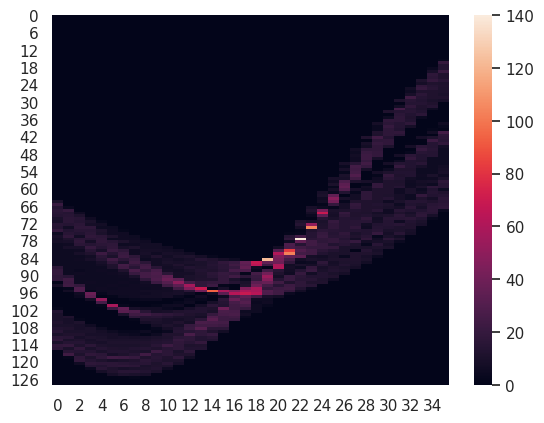

In [14]:
sns.heatmap(matrix);

## Finding best line

In [15]:
max_i, max_j = np.unravel_index(matrix.argmax(), matrix.shape)

t = angles[max_j]

r = distances[max_i]

## Drawing best line

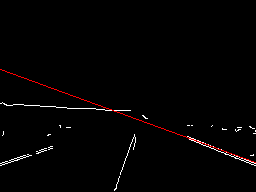

In [16]:
output_image = cv.cvtColor(canny, cv.COLOR_GRAY2BGR)

a_x = 0
a_y = round((r - a_x * np.cos(t)) / np.sin(t))

b_x = width - 1
b_y = round((r - b_x * np.cos(t)) / np.sin(t))

cv.line(output_image, (a_x, a_y), (b_x, b_y), (0, 0, 255))

cv_imshow(output_image)

You can click on the toc.png tab to the left to browse by section.